In [ ]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
#importar datos
df = pd.read_csv('/content/drive/MyDrive/Dataset/Tweets.csv')

df = df[["airline_sentiment","text"]]
df.shape

(14640, 2)

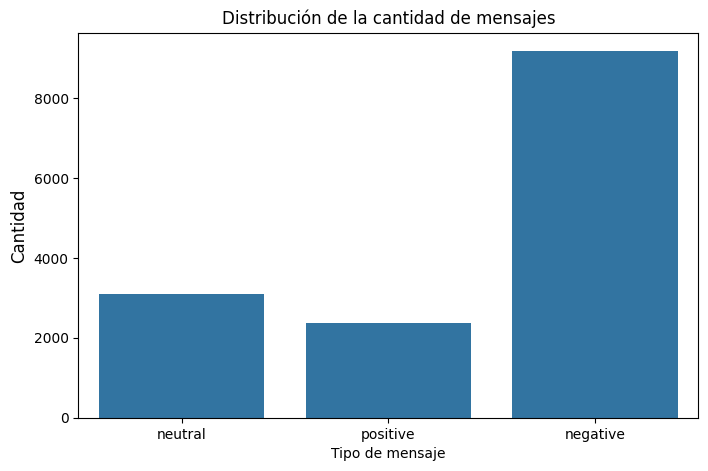

In [ ]:
# Visualizacion de tweets por sentimiento

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="airline_sentiment")

plt.title("Distribución de la cantidad de mensajes",)
plt.xlabel("Tipo de mensaje")
plt.ylabel("Cantidad", fontsize=12)

plt.show()

In [ ]:
# Vectorizacion de texto
vectorizer = CountVectorizer()

x = vectorizer.fit_transform(df['text'])
y = df['airline_sentiment']

In [ ]:
# Division de datos y entrenamiento del modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

feel_model = MultinomialNB()
feel_model.fit(x_train, y_train)

MultinomialNB()

Exactitud del modelo: 78.72%


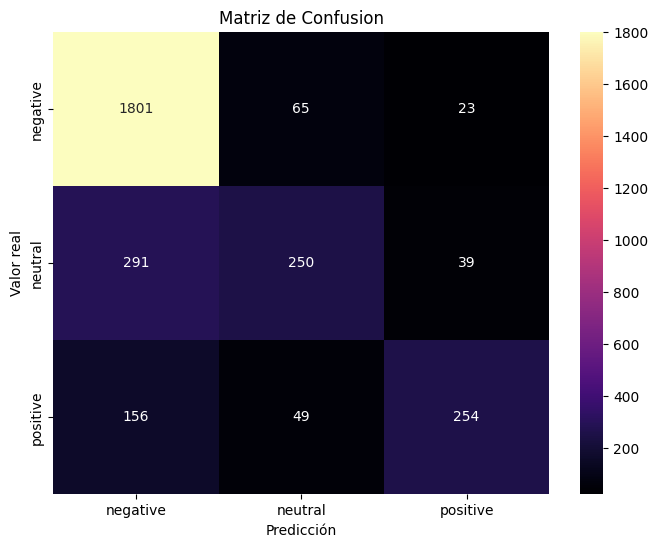

In [ ]:
# Prediccion y metricas de rendimiento
predictions = feel_model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Exactitud del modelo: {accuracy:.2%}")

cnf_mtrx = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8,6))
sns.heatmap(cnf_mtrx, annot=True, fmt="d", cmap="magma",
            xticklabels=["negative", "neutral", "positive"],
            yticklabels=["negative", "neutral", "positive"])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusion")
plt.show()